<a href="https://www.kaggle.com/code/dsptlp/conversion-histogram-a-b-test?scriptVersionId=164299253" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import strftime

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=.7)
sns.set_style("whitegrid")
sns.set_palette("bright")

In [2]:
data_path = "/kaggle/input/generaldataset/conversionABC.csv"
df = pd.read_csv(data_path, delimiter=',') 
df.head(5)

,IsConversion,ActivationDate,Group,ConversionDate
0,0,2022-01-01,Group_A,NaN
1,0,2022-01-01,Group_A,NaN
2,1,2022-01-01,Group_A,2022-01-22
3,0,2022-01-01,Group_A,NaN
4,0,2022-01-03,Group_A,NaN


In [3]:
# Convert string columns to datetime
df['ActivationDate'] = pd.to_datetime(df['ActivationDate'])
df['ConversionDate'] = pd.to_datetime(df['ConversionDate'])

# Calculate the delta of days between Date2 and Date1
df['DeltaDays'] = (df['ConversionDate'] - df['ActivationDate']).dt.days

df.head(5)

,IsConversion,ActivationDate,Group,ConversionDate,DeltaDays
0,0,2022-01-01,Group_A,NaT,NaN
1,0,2022-01-01,Group_A,NaT,NaN
2,1,2022-01-01,Group_A,2022-01-22,21.0
3,0,2022-01-01,Group_A,NaT,NaN
4,0,2022-01-03,Group_A,NaT,NaN


<Figure size 640x480 with 0 Axes>

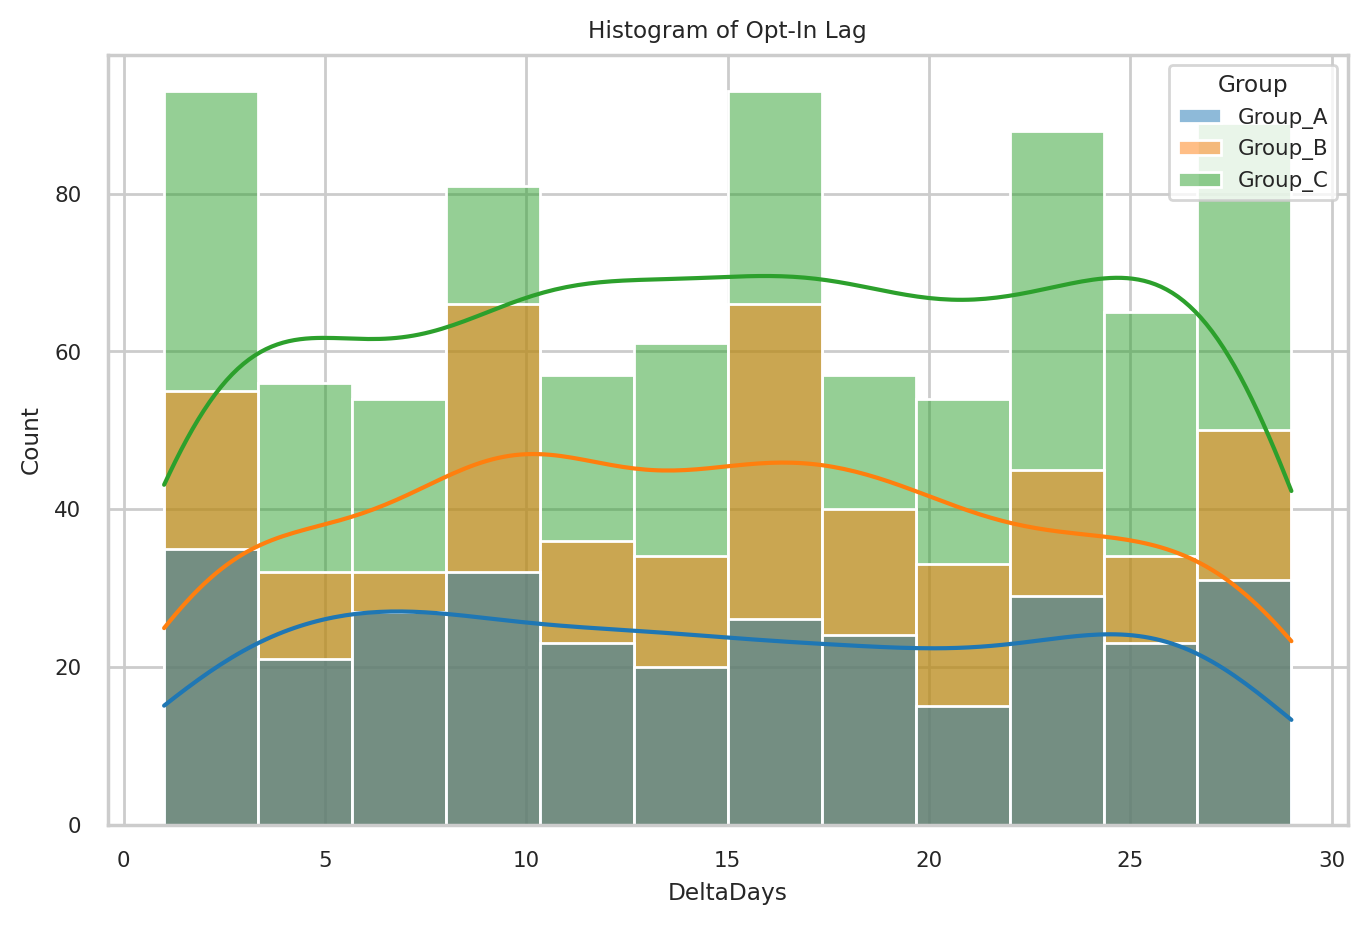

In [4]:
plt.clf()

fig = plt.figure(figsize=(8, 5),frameon =True, dpi=200)  
fig = sns.histplot(data=df[df['IsConversion']==1], x="DeltaDays", hue='Group', kde=True,palette="tab10")
plt.title('Histogram of Opt-In Lag')
fn = "optin_hist.png"
plt.savefig(fn,bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

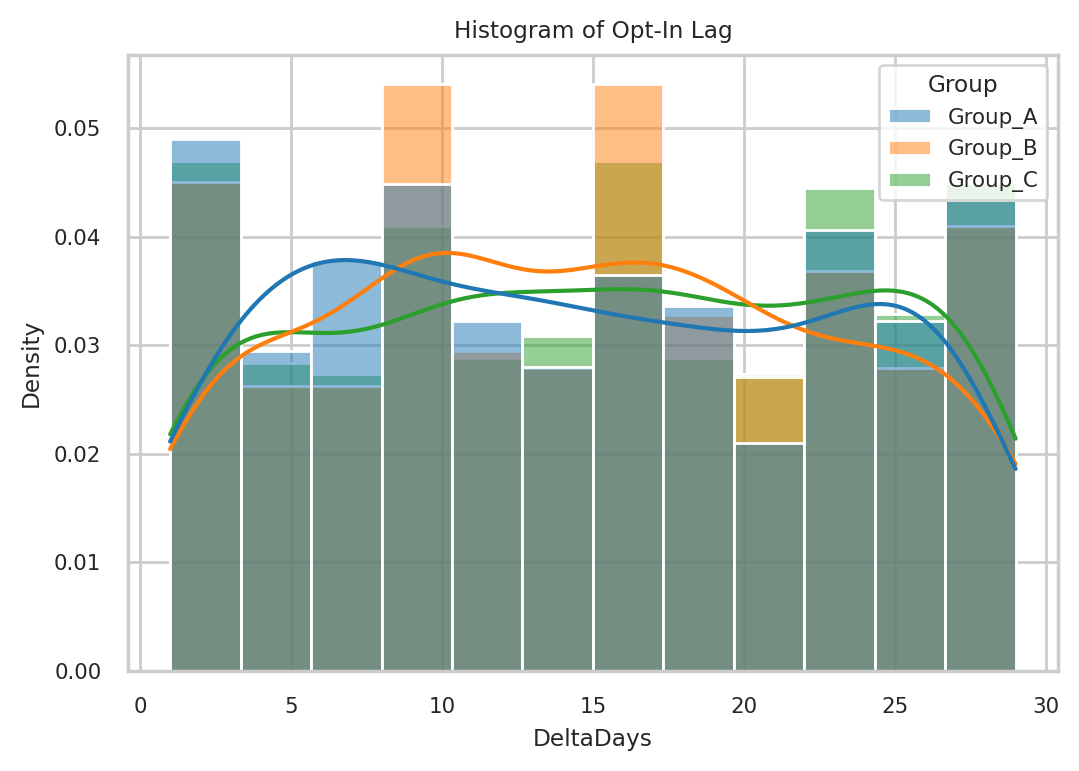

In [5]:
plt.clf()

fig = plt.figure(figsize=(6, 4),frameon =True, dpi=200)  
fig = sns.histplot(data=df[df['IsConversion']==1], x="DeltaDays", hue='Group', kde=True,palette="tab10",stat="density", common_norm=False)
plt.title('Histogram of Opt-In Lag')
fn = "optin_hist.png"
plt.savefig(fn,bbox_inches='tight')

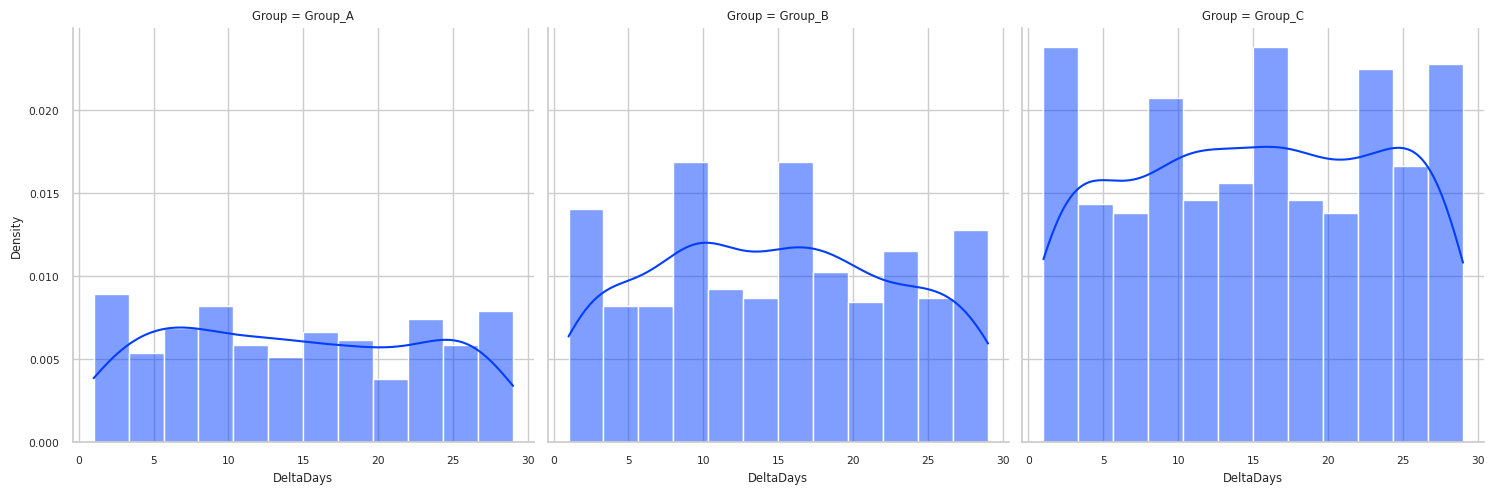

In [6]:
fig = sns.displot(data=df[df['IsConversion']==1], x="DeltaDays", col='Group', kde=True,palette="tab10",stat="density", common_norm=True)